# Notebook to plot gsynth estimations

This notebooks shows how plots 2 and 4 were made.

In [1]:
import seaborn as sns

%matplotlib inline
sns.set(context='paper', font='Fira Sans Extra Condensed', style='ticks', palette='Accent', font_scale=1.2)
%config InlineBackend.figure_format = 'retina'

import matplotlib
matplotlib.font_manager._rebuild()

In [2]:
font = {'family' : 'Fira Sans Extra Condensed',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

In [3]:
from pandas import read_csv
import matplotlib.pyplot as plt

In [4]:
path_to_results = 'results/gsynth_results/'

In [5]:
df = read_csv(path_to_results+'postprocessed_data_gsynth.csv', index_col=0)
df['time_index'] = range(-161, 757-161)
df = df.set_index('time_index')
df_ = df[df.index < 500]

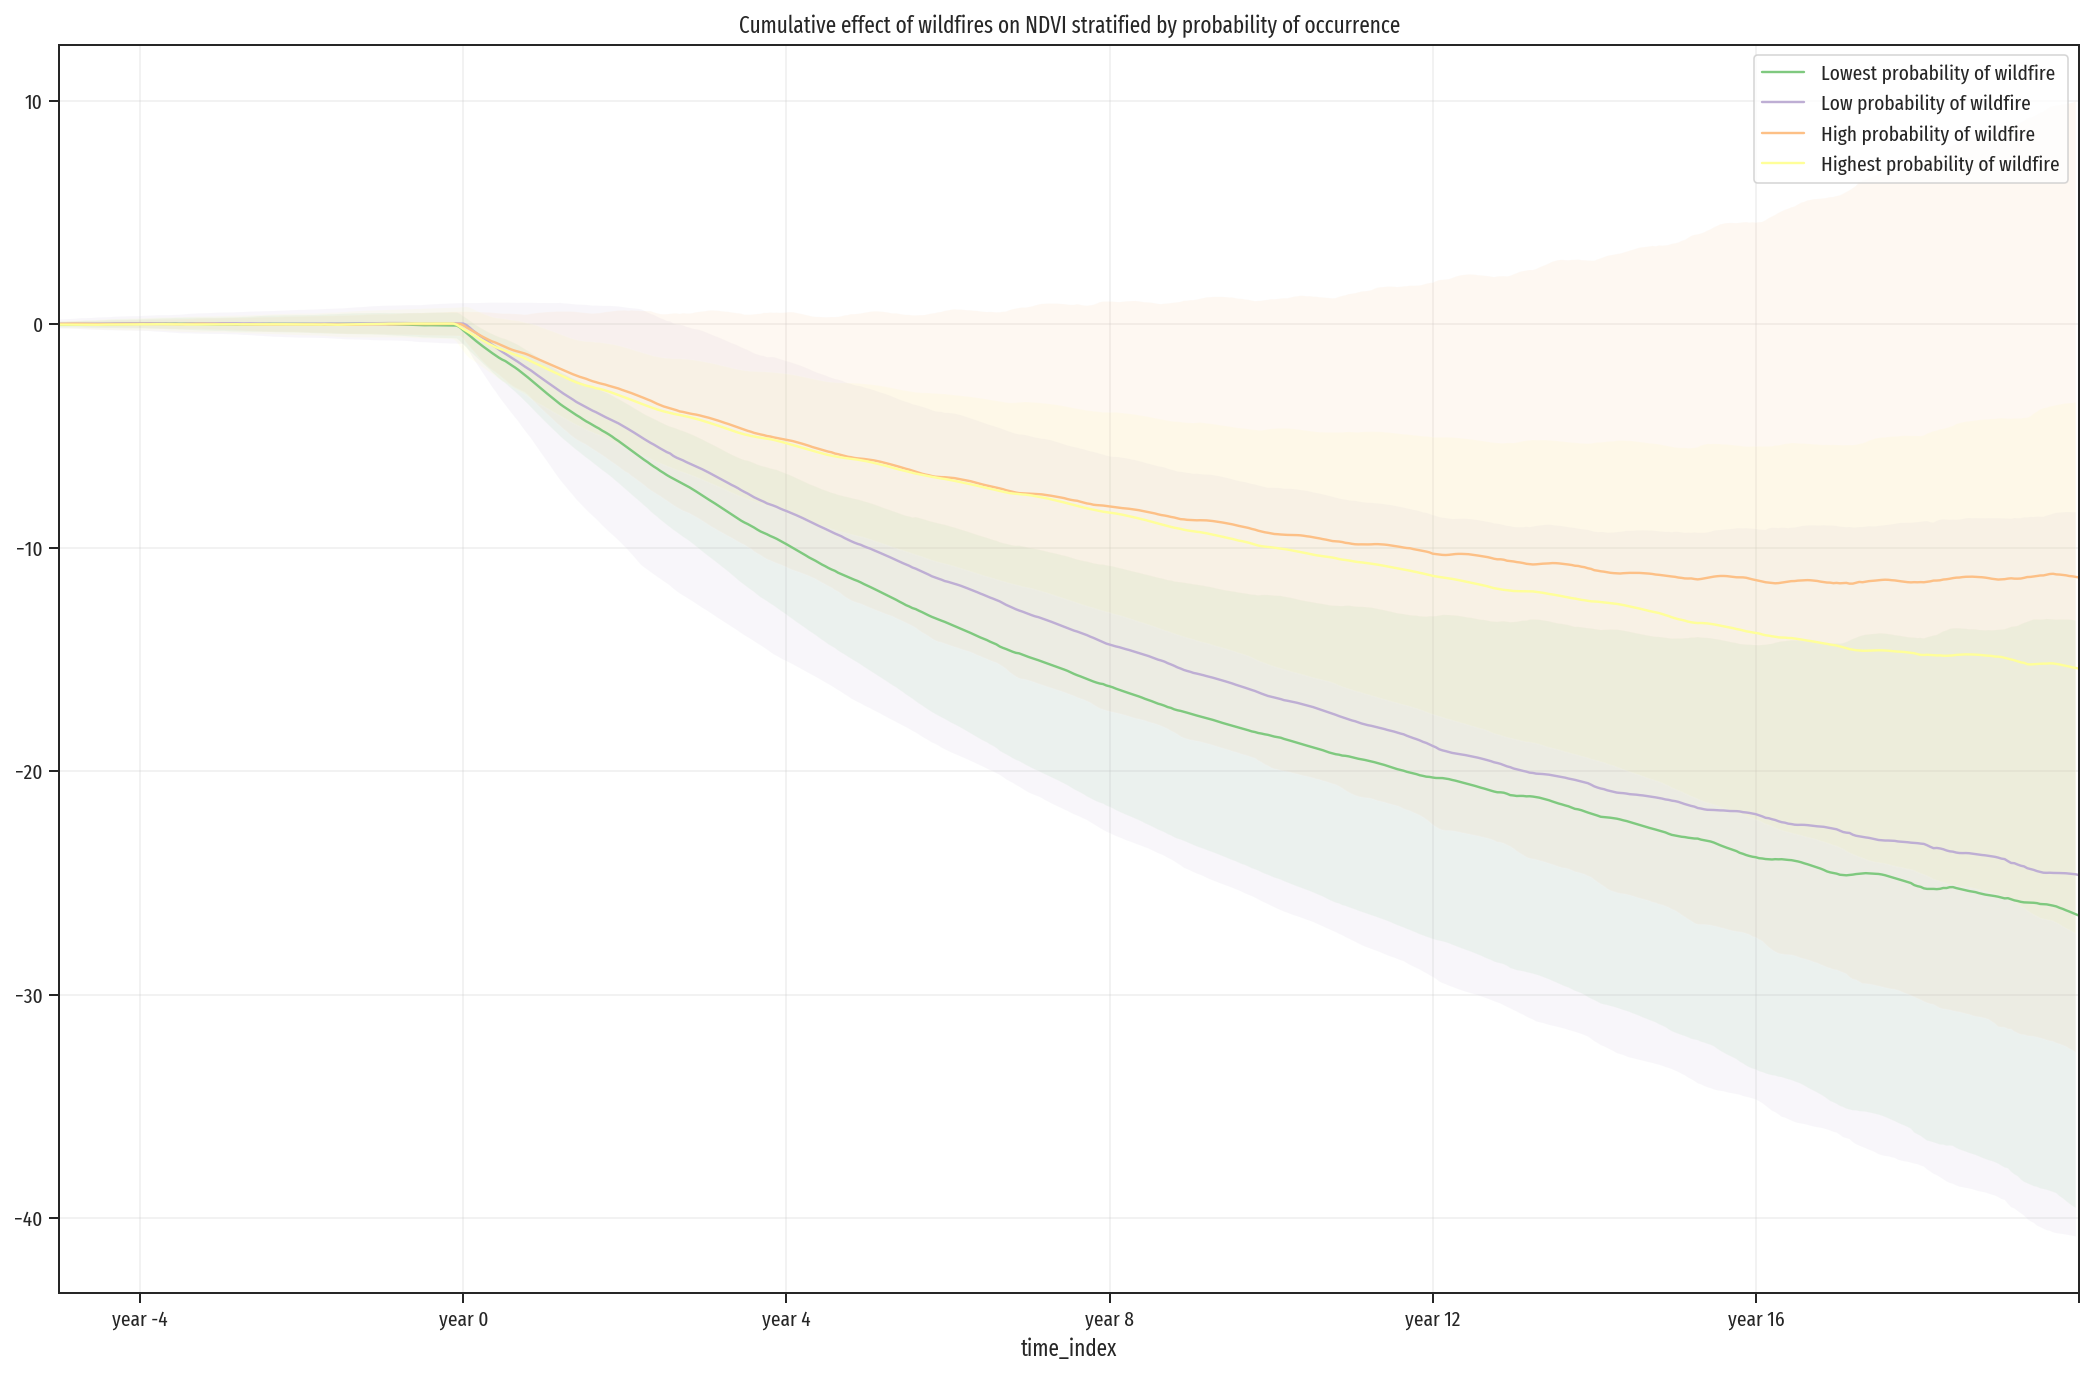

In [6]:
list_groups = list(range(4))
list_counterfactuals = list(range(1, 4))
list_variables = ['ndvi', 'ndmi', 'nbr']

fig, ax = plt.subplots(figsize=(15, 10))
df.ndvi_group_0_counter_1_att.cumsum().plot(ax=ax, label='Lowest probability of wildfire')
ax.fill_between(df_.ndvi_group_0_counter_1_att.index,
                df_.ndvi_group_0_counter_1_cilower.cumsum(),
                df_.ndvi_group_0_counter_1_ciupper.cumsum(), alpha=.1)
df.ndvi_group_1_counter_1_att.cumsum().plot(ax=ax, label='Low probability of wildfire')
ax.fill_between(df_.ndvi_group_1_counter_1_att.index,
                df_.ndvi_group_1_counter_1_cilower.cumsum(),
                df_.ndvi_group_1_counter_1_ciupper.cumsum(), alpha=.1)
df.ndvi_group_2_counter_1_att.cumsum().plot(ax=ax, label='High probability of wildfire')
ax.fill_between(df_.ndvi_group_2_counter_1_att.index,
                df_.ndvi_group_2_counter_1_cilower.cumsum(),
                df_.ndvi_group_2_counter_1_ciupper.cumsum(), alpha=.1)
df.ndvi_group_3_counter_1_att.cumsum().plot(ax=ax, label='Highest probability of wildfire')
ax.fill_between(df_.ndvi_group_3_counter_1_att.index,
                df_.ndvi_group_3_counter_1_cilower.cumsum(),
                df_.ndvi_group_3_counter_1_ciupper.cumsum(), alpha=.1)

plt.legend()
plt.xlim([-125, 500])
plt.title('Cumulative effect of wildfires on NDVI stratified by probability of occurrence')
plt.xticks([i for i in range(-100, 501, 100)], ['year -4', 'year 0', 'year 4', 'year 8', 'year 12', 'year 16'])
plt.grid(True, alpha=.3)
plt.tight_layout()
plt.show()
fig.savefig(path_to_results+'Cumulative_effects_stratified_outcomes.tiff',
        dpi=300,
        format='tiff',
        pil_kwargs={'compression':'tiff_lzw'})

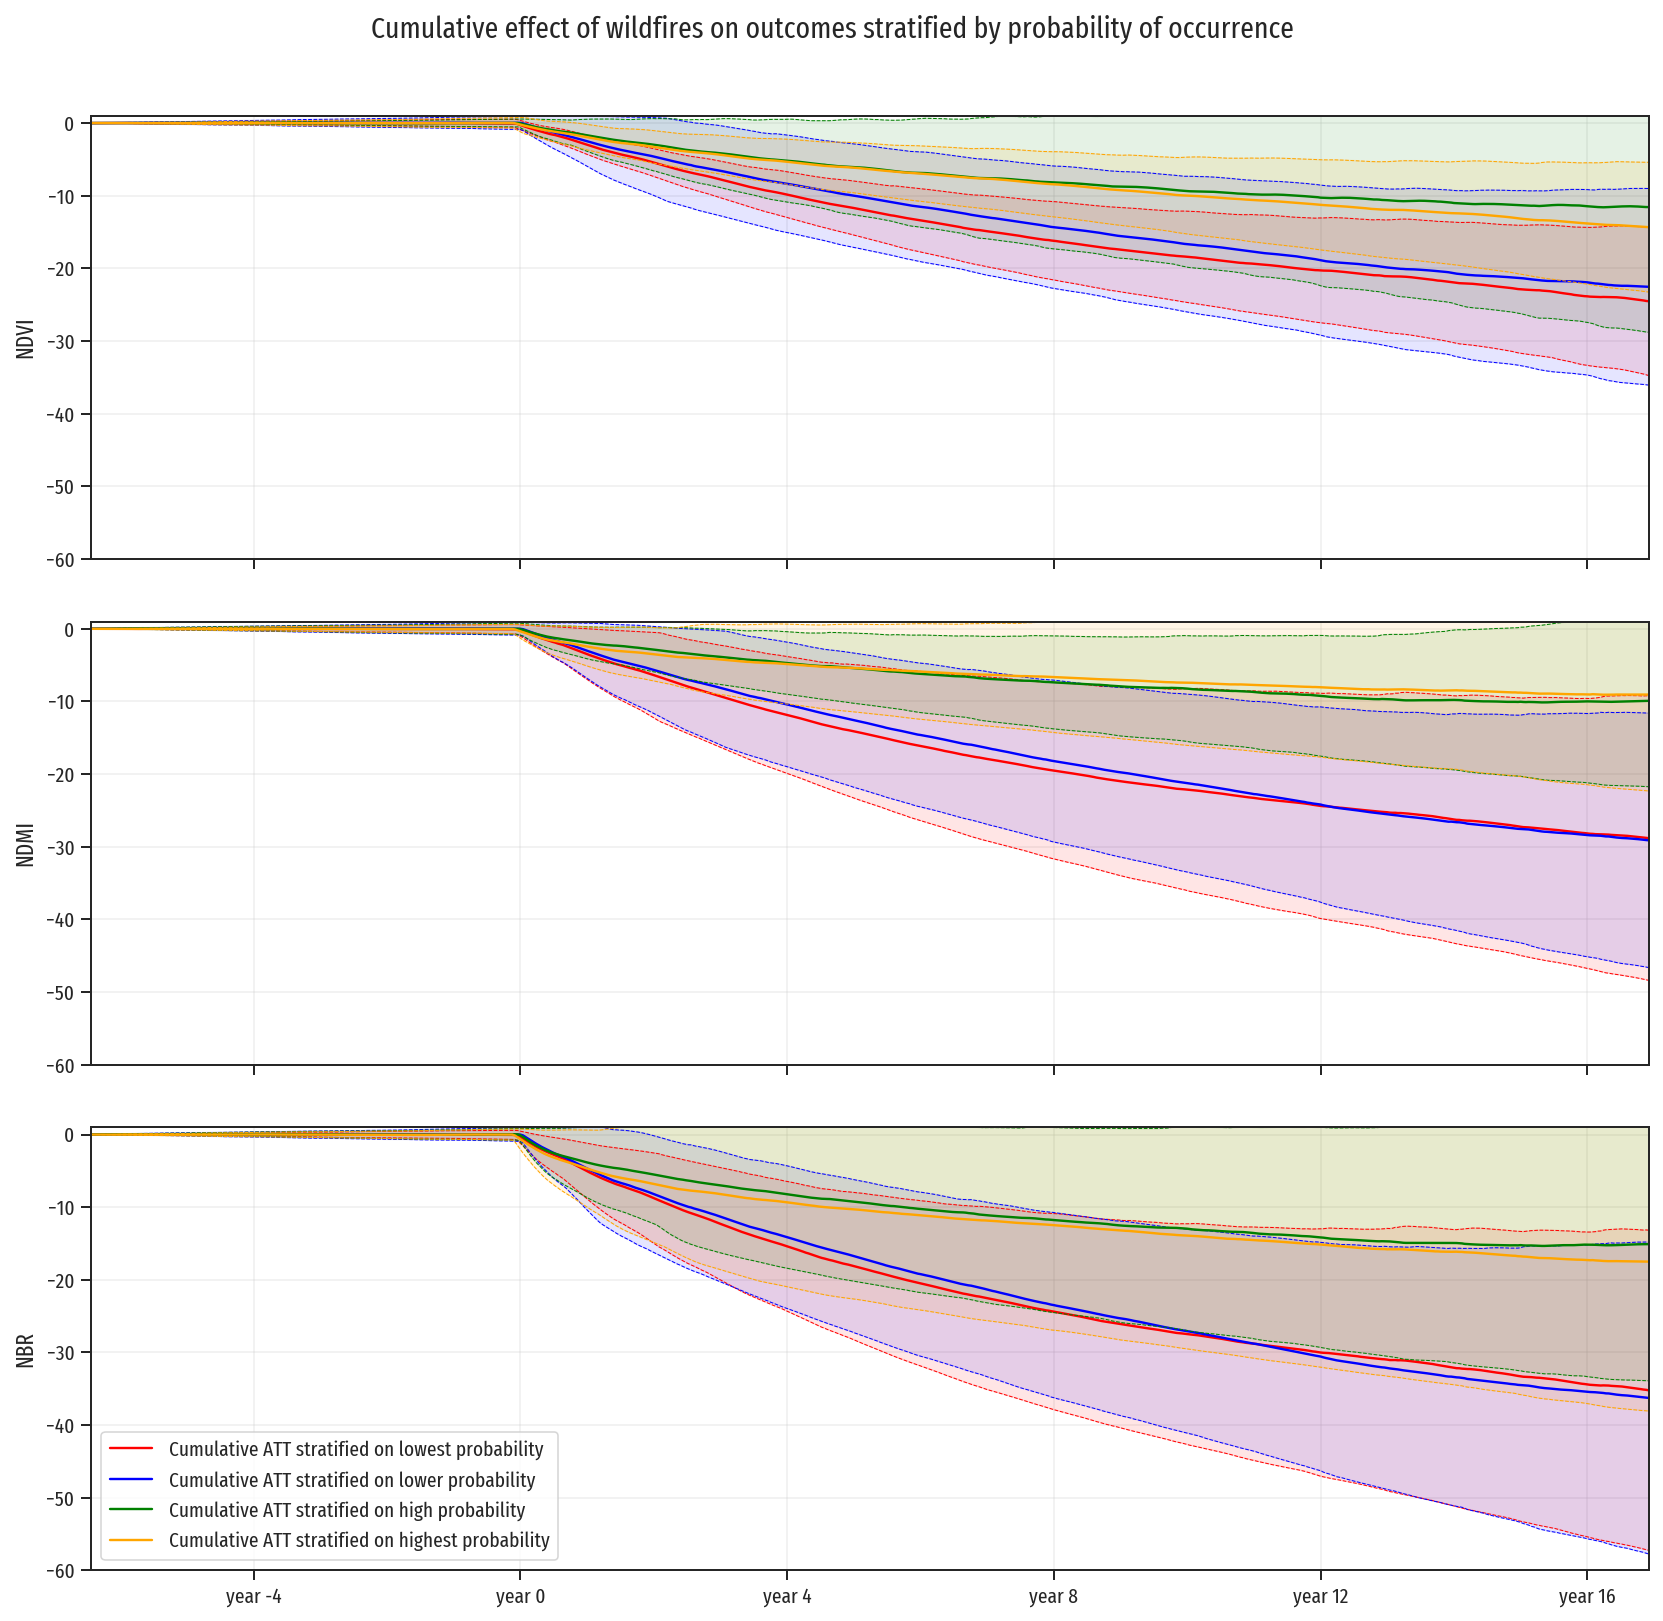

In [7]:
fig, ax = plt.subplots(nrows=3, figsize=(12, 12), sharex=True)
colors = ['red', 'blue', 'green', 'orange']
label_names = ['lowest probability', 'lower probability', 'high probability', 'highest probability']
for i in range(3):
    var_ = list_variables[i]
    for group_ in range(0, 4):
        df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_att'].cumsum().plot(ax=ax[i], color=colors[group_],
                                                                               label='Cumulative ATT stratified on '+label_names[group_])
        df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_cilower'].cumsum().plot(ax=ax[i], color=colors[group_],
                                                                               label='', linestyle='--', linewidth=.5)
        df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_ciupper'].cumsum().plot(ax=ax[i], color=colors[group_],
                                                                               label='', linestyle='--', linewidth=.5)
        ax[i].fill_between(df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_att'].index,
                         df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_cilower'].cumsum(),
                         df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_ciupper'].cumsum(), 
                           color=colors[group_], alpha=.1)
        ax[i].set(ylabel=var_.upper(), xlabel=None, ylim=[-60, 1], xlim=[-161, 745-161*2])
        ax[i].grid(True, alpha=.3)
    ax[i].set_xticklabels(['year -8', 'year -4', 'year 0', 'year 4', 'year 8', 'year 12', 'year 16'])
    
plt.legend()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('Cumulative effect of wildfires on outcomes stratified by probability of occurrence', size=15)
plt.show()

fig.savefig(path_to_results+'Cumulative_effects_stratified_outcomes.tiff',
        dpi=400,
        format='tiff',
        pil_kwargs={'compression':'tiff_lzw'})




In [8]:
df_averages_gsynth = read_csv('results/gsynth_results/postprocessed_data_averages_gsynth.csv', index_col=1)

In [9]:
df_averages_gsynth.head()

,Unnamed: 0,control_ndvi_group_0_counter_1_att,treated_ndvi_group_0_counter_1_att,control_ndvi_group_0_counter_2_att,treated_ndvi_group_0_counter_2_att,control_ndmi_group_0_counter_1_att,treated_ndmi_group_0_counter_1_att,control_ndmi_group_0_counter_2_att,treated_ndmi_group_0_counter_2_att,control_nbr_group_0_counter_1_att,...,control_ndvi_counter_2_att,treated_ndvi_counter_2_att,control_ndmi_counter_1_att,treated_ndmi_counter_1_att,control_ndmi_counter_2_att,treated_ndmi_counter_2_att,control_nbr_counter_1_att,treated_nbr_counter_1_att,control_nbr_counter_2_att,treated_nbr_counter_2_att
X1.589,,,,,,,,,,,,,,,,,,,,,
1,1,0.555951,0.556971,0.528843,0.531238,0.171073,0.171434,0.155849,0.159028,0.408265,...,0.465557,0.465995,0.093695,0.093095,0.093555,0.093095,0.309753,0.309447,0.309631,0.309447
2,2,0.524436,0.526307,0.556251,0.557470,0.141432,0.140160,0.175055,0.174210,0.373193,...,0.432057,0.432722,0.064271,0.063304,0.065447,0.063304,0.273768,0.272714,0.275285,0.272714
3,3,0.535992,0.533904,0.526815,0.528489,0.152276,0.150423,0.138334,0.136872,0.386671,...,0.432014,0.430502,0.068711,0.068317,0.068771,0.068317,0.279617,0.278859,0.279443,0.278859
4,4,0.531362,0.532304,0.535764,0.533387,0.158596,0.158989,0.152886,0.150946,0.398279,...,0.429440,0.429084,0.066911,0.066920,0.067820,0.066920,0.279643,0.279924,0.280296,0.279924
5,5,0.535663,0.533358,0.531612,0.531628,0.162409,0.162329,0.159062,0.159692,0.402458,...,0.426514,0.426168,0.061108,0.060101,0.061810,0.060101,0.274215,0.273288,0.275086,0.273288


In [10]:
df_averages_gsynth.columns

Index(['Unnamed: 0', 'control_ndvi_group_0_counter_1_att',
       'treated_ndvi_group_0_counter_1_att',
       'control_ndvi_group_0_counter_2_att',
       'treated_ndvi_group_0_counter_2_att',
       'control_ndmi_group_0_counter_1_att',
       'treated_ndmi_group_0_counter_1_att',
       'control_ndmi_group_0_counter_2_att',
       'treated_ndmi_group_0_counter_2_att',
       'control_nbr_group_0_counter_1_att',
       'treated_nbr_group_0_counter_1_att',
       'control_nbr_group_0_counter_2_att',
       'treated_nbr_group_0_counter_2_att',
       'control_ndvi_group_1_counter_1_att',
       'treated_ndvi_group_1_counter_1_att',
       'control_ndvi_group_1_counter_2_att',
       'treated_ndvi_group_1_counter_2_att',
       'control_ndvi_group_1_counter_averages_att',
       'treated_ndvi_group_1_counter_averages_att',
       'control_ndmi_group_1_counter_1_att',
       'treated_ndmi_group_1_counter_1_att',
       'control_ndmi_group_1_counter_2_att',
       'treated_ndmi_group_1_co

In [11]:
[i for i in df_averages_gsynth.columns  if 'averages' in i]

['control_ndvi_group_1_counter_averages_att',
 'treated_ndvi_group_1_counter_averages_att',
 'control_ndmi_group_1_counter_averages_att',
 'treated_ndmi_group_1_counter_averages_att',
 'control_nbr_group_1_counter_averages_att',
 'treated_nbr_group_1_counter_averages_att',
 'control_ndvi_group_2_counter_averages_att',
 'treated_ndvi_group_2_counter_averages_att',
 'control_ndmi_group_2_counter_averages_att',
 'treated_ndmi_group_2_counter_averages_att',
 'control_nbr_group_2_counter_averages_att',
 'treated_nbr_group_2_counter_averages_att']

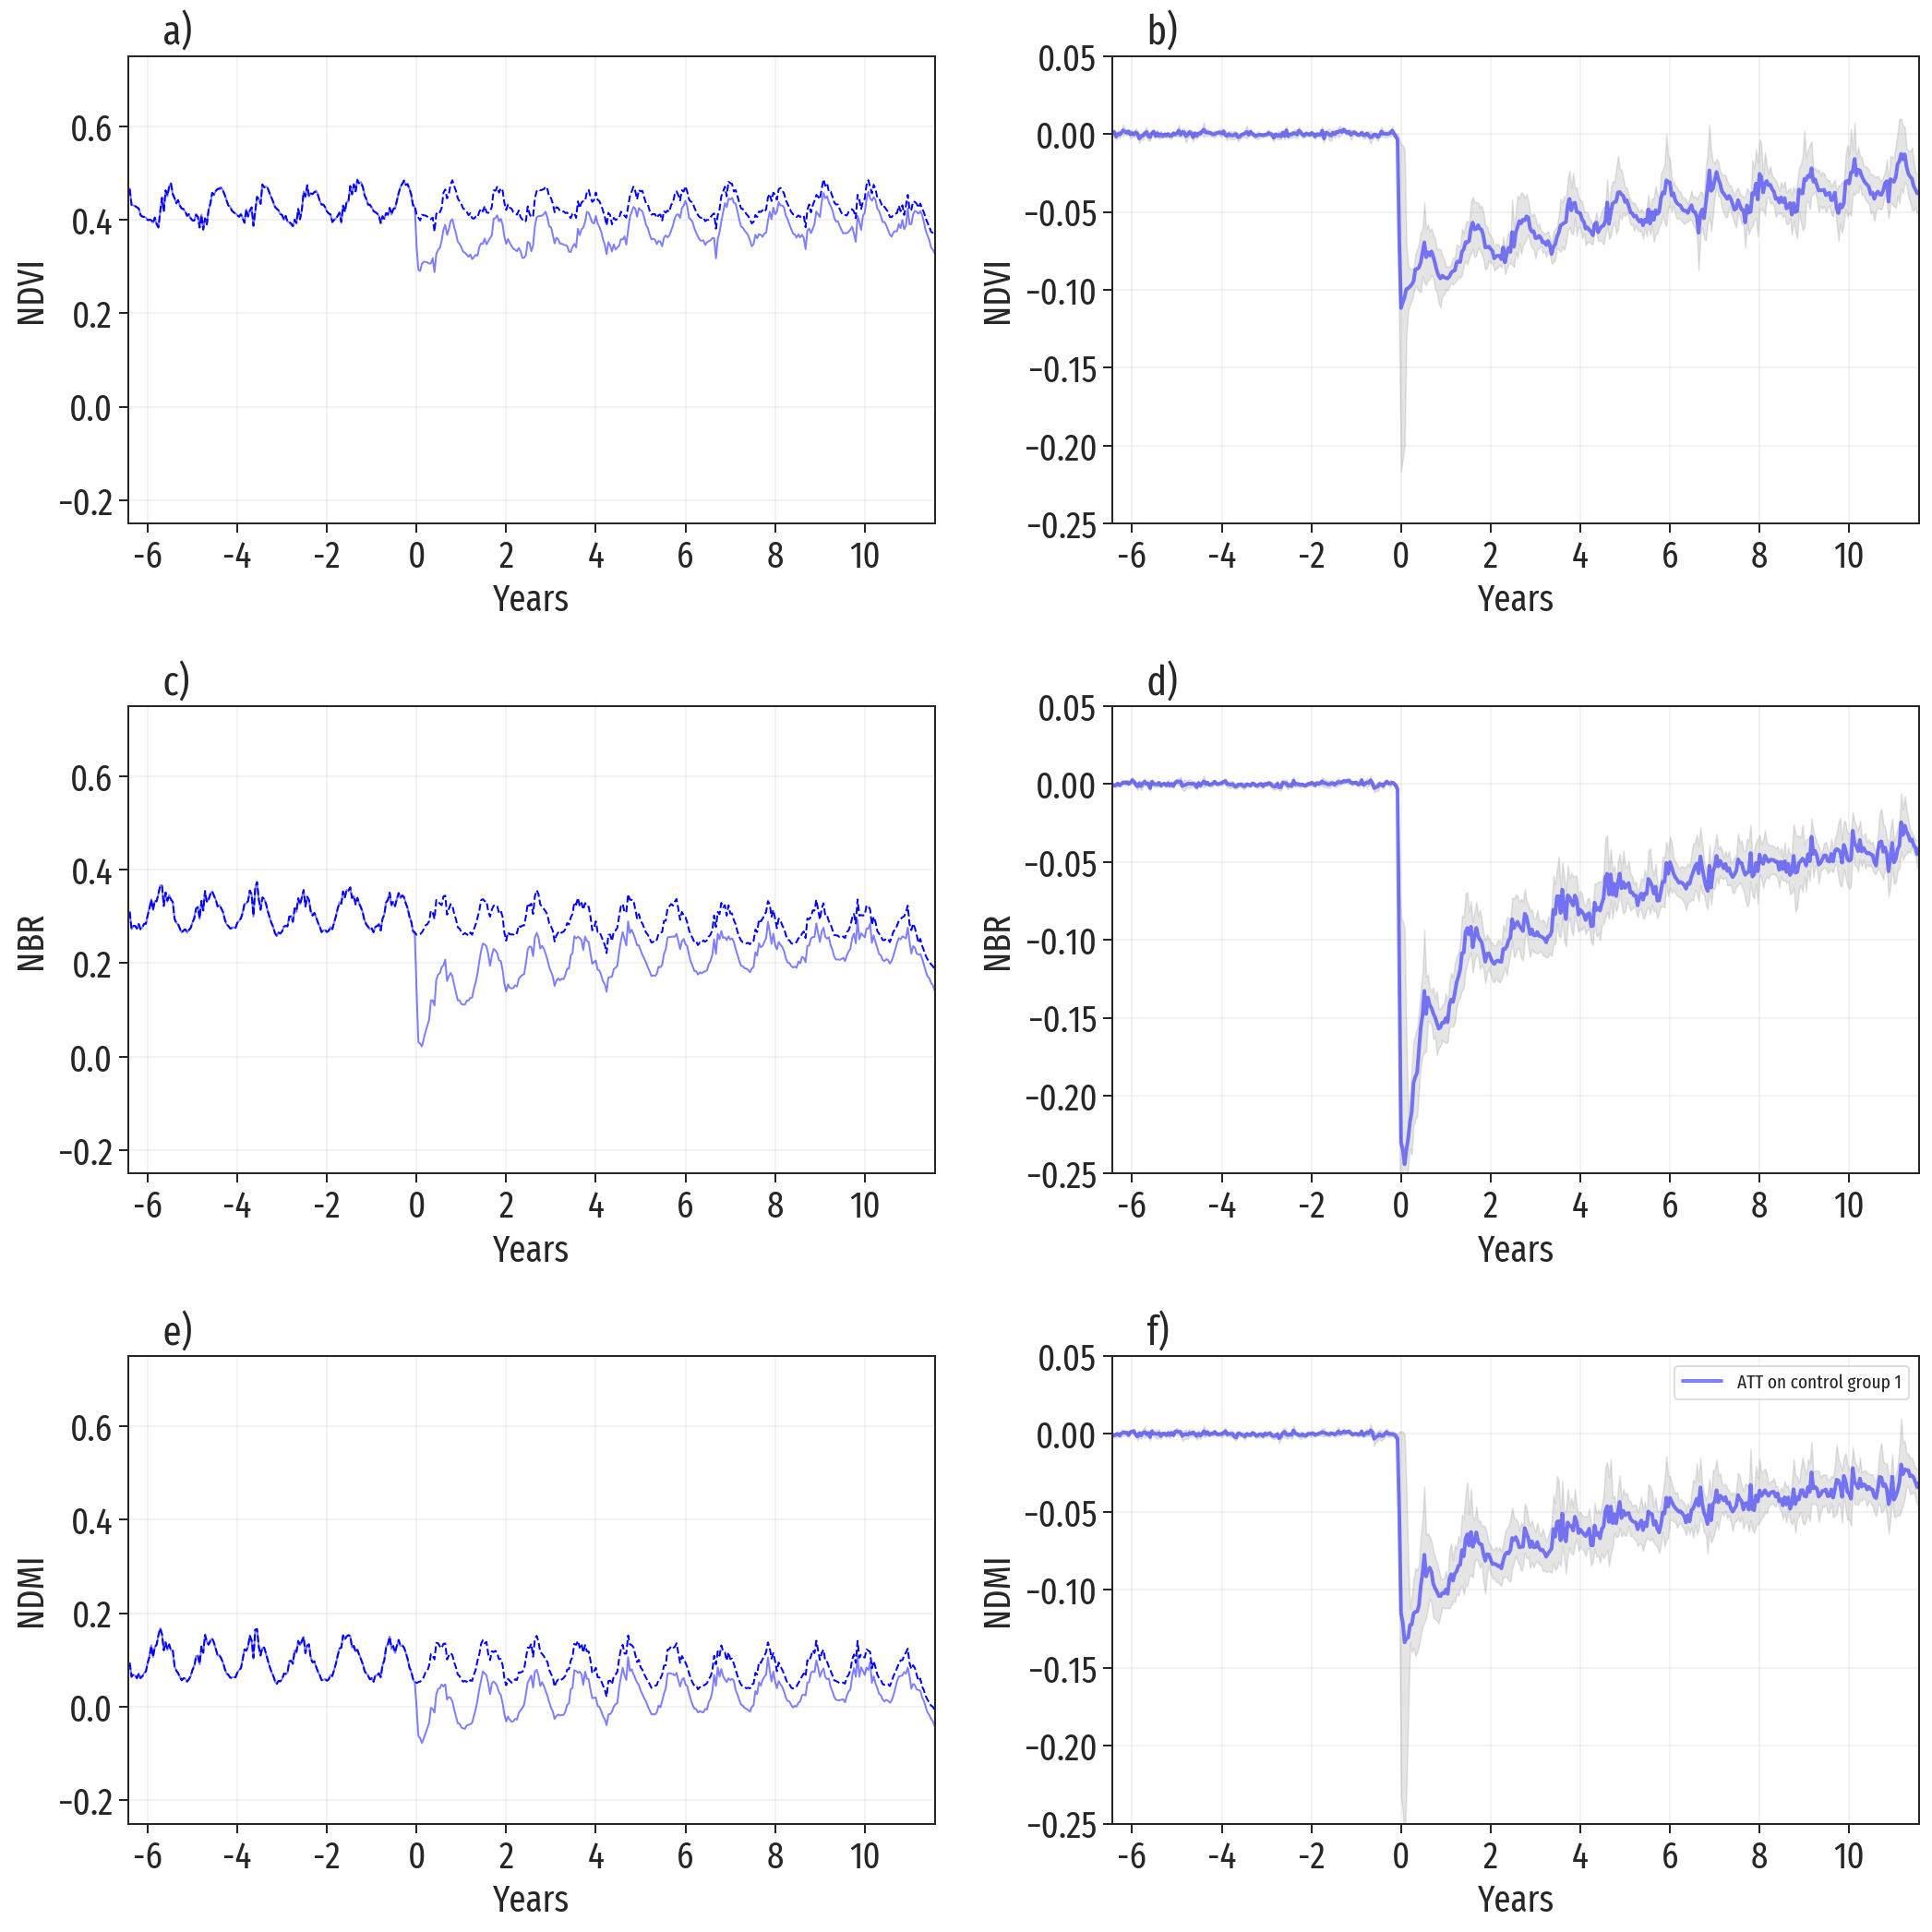

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

list_variables = ['ndvi', 'nbr', 'ndmi']
colors = ['darkblue', 'blue', 'turquoise', 'darkblue']
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i in range(3):
    var_ = list_variables[i]
    for group_ in range(1, 2):
        df_averages_gsynth['treated_{}_counter_{}_att'.format(var_, group_)].plot(ax=ax[i, 0],
                                                            label='{}'.format(var_), linewidth=1,
                                                                                  color=colors[group_], alpha=.5)
        df_averages_gsynth['control_{}_counter_{}_att'.format(var_, group_)].plot(ax=ax[i, 0],
                                                            label='{}'.format(var_), linewidth=1,
                                                                                  linestyle='--',
                                                                                  color=colors[group_])
    ax[i, 0].set(xlim=[0, 450],
                 ylim=[-.25, .75],#ylim=[-.1, 0.5],
                )
    ax[i, 0].set_ylabel(var_.upper(), fontsize=22)
    ax[i, 0].set_xlabel('Years', fontsize=22)
    ax[i, 0].set_xticks(range(11, 461, 50))
    ax[i, 0].set_xticklabels(range(-6, 11, 2), fontsize=22)
    ax[i, 0].grid(True, alpha=.3)
    
for i in range(3):
    var_ = list_variables[i]
    for group_ in range(1, 2):
        df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_att']\
                            .plot(ax=ax[i, 1],
                                  label='ATT on control group '+str(group_),
                                  linewidth=2, color=colors[group_], alpha=.5)
        ax[i, 1].fill_between(df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_att'].index,
                         df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_cilower'], # - df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_att'].mean()) / df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_att'].std()) ,
                         df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_ciupper'], # - df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_att'].mean()) / df_[var_ + '_group_' + str(group_) + '_counter_' + 'averages' + '_att'].std()),
                              color='grey',
                              alpha=.2)
    ax[i, 1].set(
                 ylim=[-.25, .05],
                 xlim=[-161, 450-161])
    ax[i, 1].set_ylabel(var_.upper(), fontsize=22)
    ax[i, 1].set_xlabel('Years', fontsize=22)
    ax[i, 1].set_xticks(range(-150, 450-150, 50))
    ax[i, 1].set_xticklabels(range(-6, 11, 2), fontsize=22)
    ax[i, 1].grid(True, alpha=.3)
    
plt.legend()

# plt.suptitle('ATT on outcomes on the different counterfactual regions', size=15)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

ax[0, 0].set_title('    a)', loc='left', fontsize=22, fontweight='bold')
ax[1, 0].set_title('    c)', loc='left', fontsize=22, fontweight='bold')
ax[2, 0].set_title('    e)', loc='left', fontsize=22, fontweight='bold')
ax[0, 1].set_title('    b)', loc='left', fontsize=22, fontweight='bold')
ax[1, 1].set_title('    d)', loc='left', fontsize=22, fontweight='bold')
ax[2, 1].set_title('    f)', loc='left', fontsize=22, fontweight='bold')

for _row in range(3):
    for _col in range(2):        
        for item in ([ax[_row, _col].title, ax[_row, _col].xaxis.label, ax[_row, _col].yaxis.label] +
                     ax[_row, _col].get_xticklabels() + ax[_row, _col].get_yticklabels()):
            item.set_fontsize(20)
    
plt.tight_layout()
plt.show()
fig.savefig(path_to_results+'ATT_counterfactual_regions.tiff',
        dpi=400,
        format='tiff',
        pil_kwargs={'compression':'tiff_lzw'})

fig.savefig(path_to_results+'ATT_counterfactual_regions.png',
        dpi=400,
        format='png',
        pil_kwargs={'compression':'tiff_lzw'})



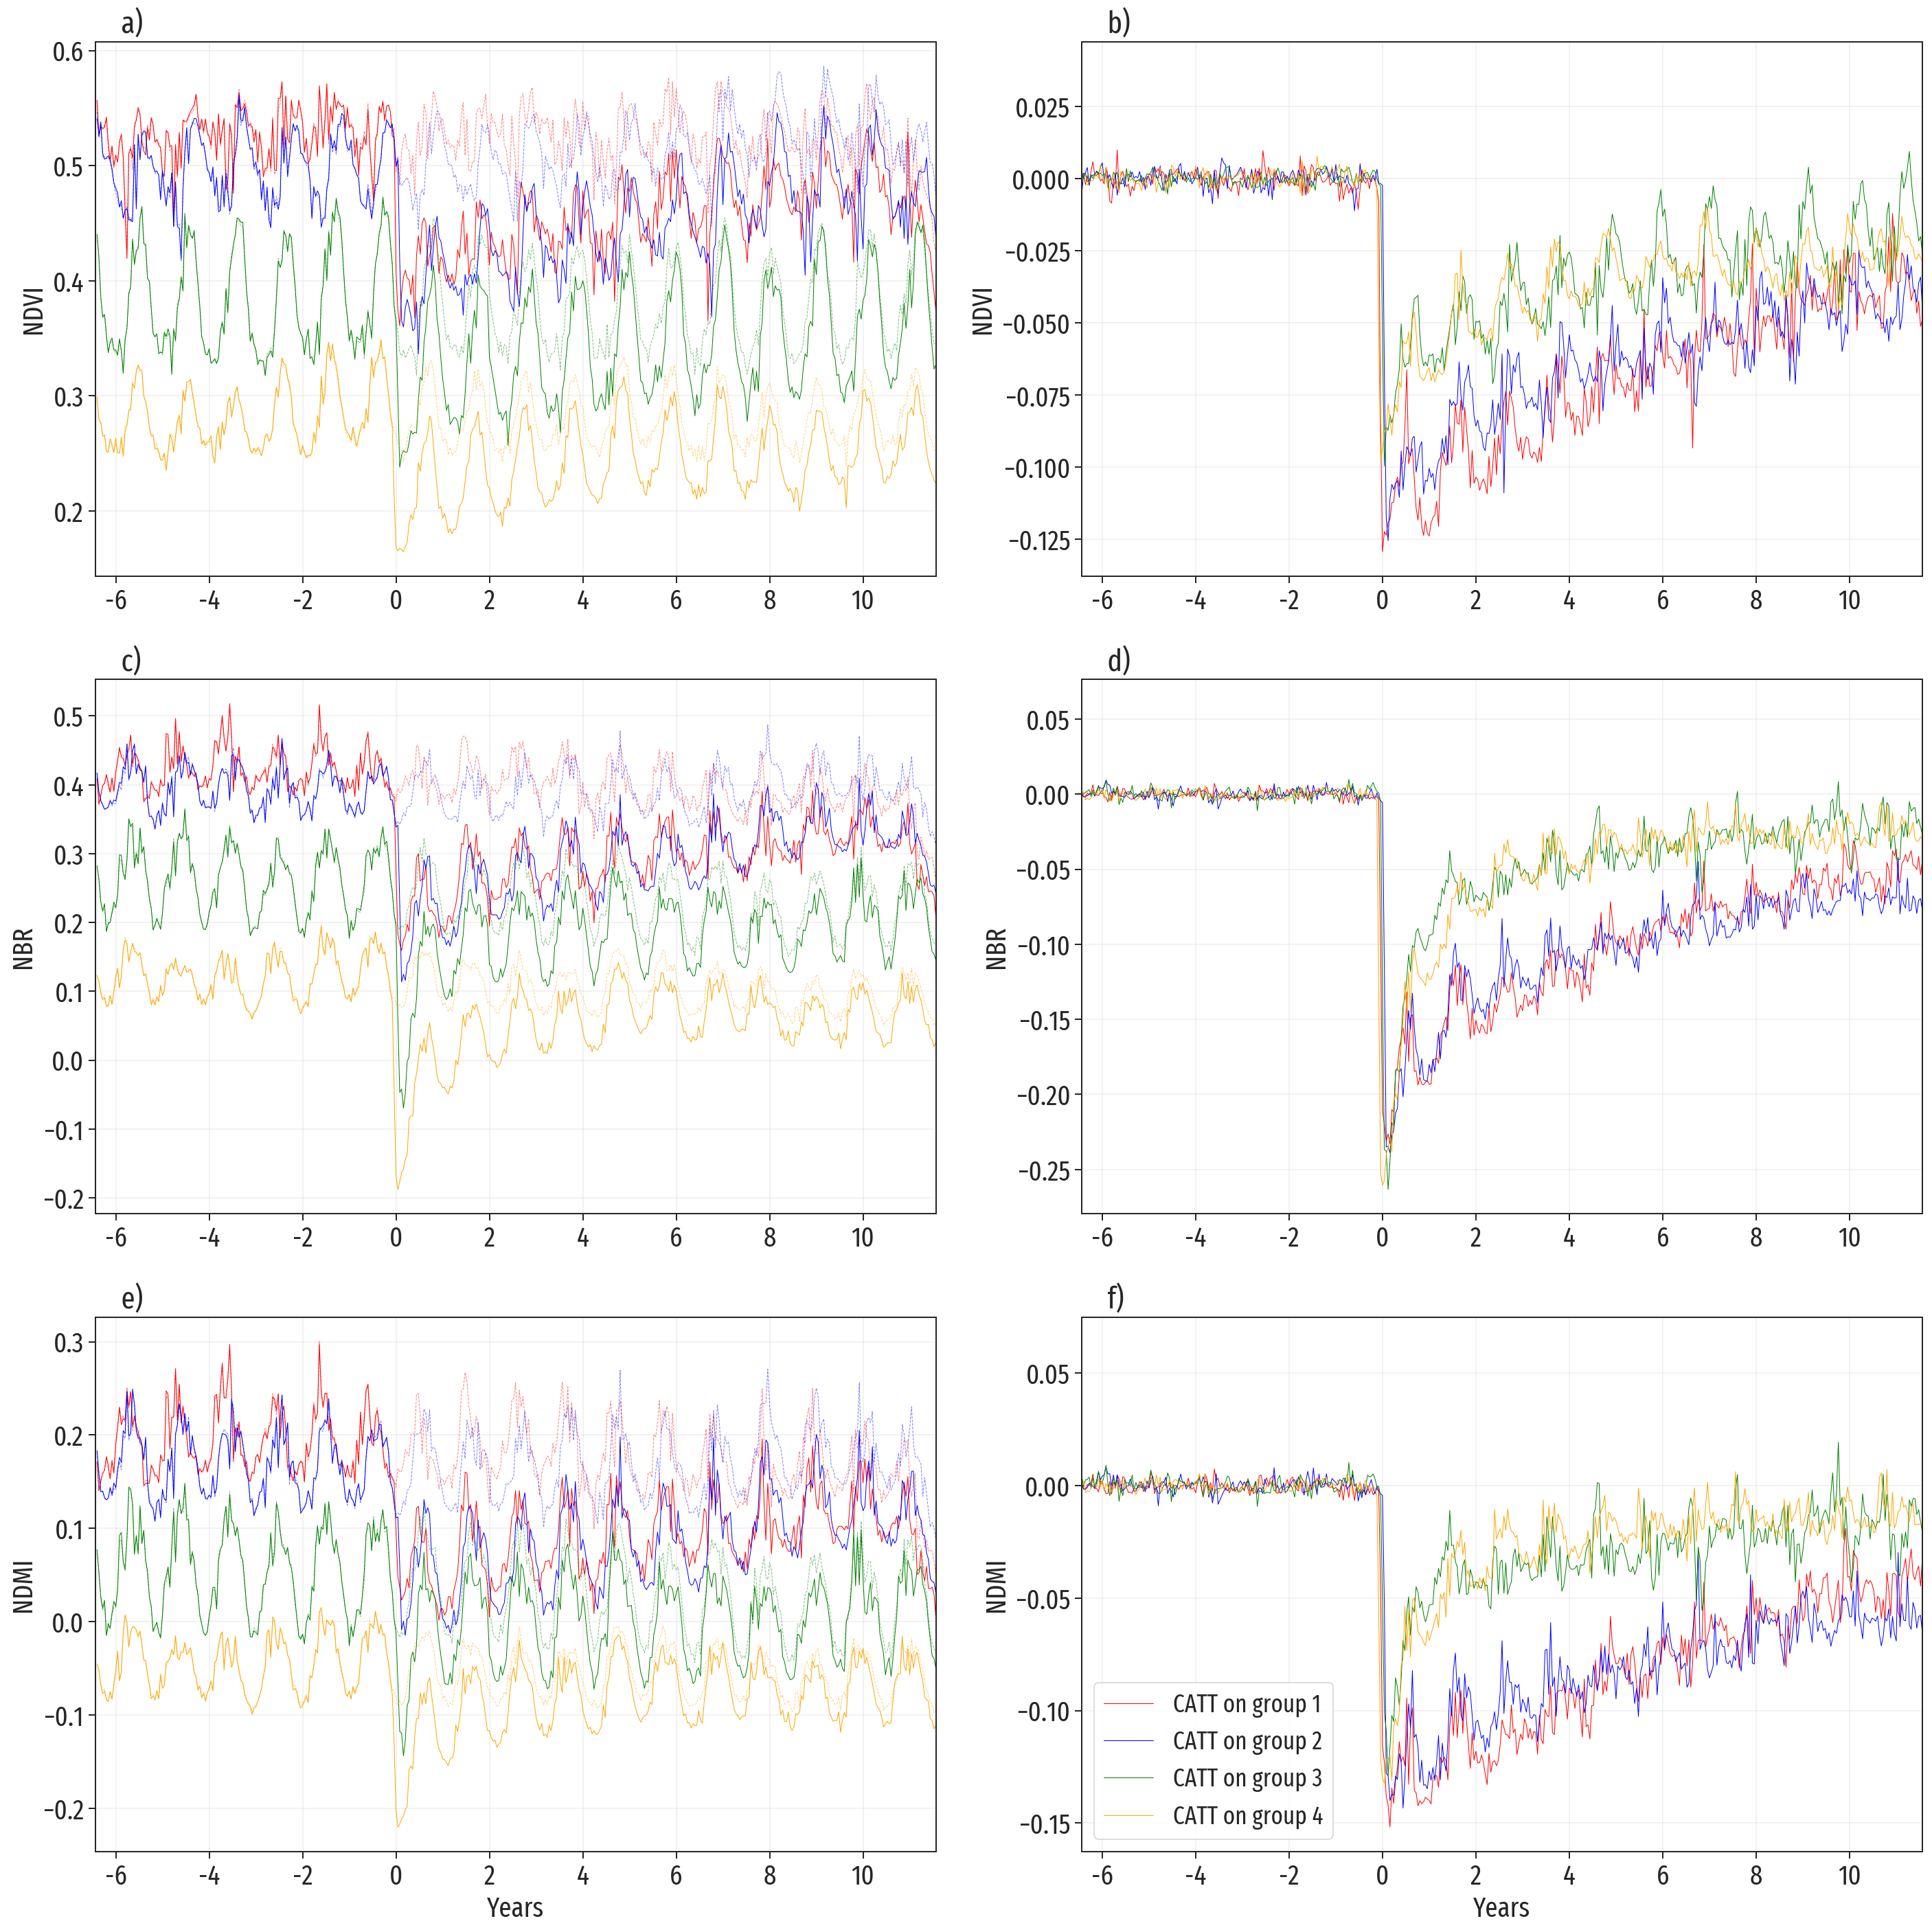

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
colors = ['red', 'blue', 'green', 'orange']

for i in range(3):
    var_ = list_variables[i]
    for group_ in range(0, 4):
        df_averages_gsynth['treated_{}_group_{}_counter_{}_att'.format(var_, group_, 1)].plot(ax=ax[i, 0],
                                                            label='{}'.format(var_), linewidth=.5,
                                                                                  color=colors[group_])
        df_averages_gsynth['control_{}_group_{}_counter_{}_att'.format(var_, group_, 1)].plot(ax=ax[i, 0],
                                                            label='{}'.format(var_), linewidth=.5,
                                                                                  linestyle='--',
                                                                                  color=colors[group_], alpha=.5)
    ax[i, 0].set_ylabel(var_.upper())
    ax[i, 0].set_xlabel(None)
    ax[i, 0].set_xlim([0, 450])
    ax[i, 0].set_xticks(range(11, 461, 50))
    #ax[i, 0].set_xticklabels(range(-150, 251, 50))
    
    #ax[i, 0].set_xticks(range(11, 461, 50))
    ax[i, 0].set_xticklabels(range(-6, 11, 2))
    
    ax[i, 0].grid(True, alpha=.3)

for i in range(3):
    var_ = list_variables[i]
    for group_ in range(0, 4):
        (df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_att']).plot(ax=ax[i, 1], 
                                                                              color=colors[group_], 
                                                                              linewidth=.5,
                                                                              label='CATT on group '+str(group_ +1))
        #ax[i, 1].fill_between(df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_att'].index,
        #                 (df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_cilower']),
        #                 (df_[var_ + '_group_' + str(group_) + '_counter_' + '1' + '_ciupper']),
        #    alpha=.1)
    ax[i, 1].set_ylabel(var_.upper())
    ax[i, 1].set_xlabel(None)
    ax[i, 1].set_xlim([-161, 450-161])
    ax[i, 1].set_xticks(range(-150, 450-150, 50))
    ax[i, 1].set_xticklabels(range(-6, 11, 2))
    # ax[i, 1].set_ylim([-0.3, .05])
    ax[i, 1].grid(True, alpha=.3)
    ax[i, 1].grid(True, alpha=.3)


plt.legend(fontsize=18)
ax[2,0].set_xlabel('Years')
ax[2,1].set_xlabel('Years')
#plt.xticks([i for i in range(-100,
#                             501, 100)],
#           ['year -4', 'year 0', 'year 4', 'year 8', 'year 12', 'year 16'])
#plt.suptitle('ATT on outcomes stratified by probability of incidence', size=15)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
ax[0, 0].set_title('    a)', loc='left', fontsize=22, fontweight='bold')
ax[1, 0].set_title('    c)', loc='left', fontsize=22, fontweight='bold')
ax[2, 0].set_title('    e)', loc='left', fontsize=22, fontweight='bold')
ax[0, 1].set_title('    b)', loc='left', fontsize=22, fontweight='bold')
ax[1, 1].set_title('    d)', loc='left', fontsize=22, fontweight='bold')
ax[2, 1].set_title('    f)', loc='left', fontsize=22, fontweight='bold')

for _row in range(3):
    for _col in range(2):        
        for item in ([ax[_row, _col].title, ax[_row, _col].xaxis.label, ax[_row, _col].yaxis.label] +
                     ax[_row, _col].get_xticklabels() + ax[_row, _col].get_yticklabels()):
            item.set_fontsize(20)
    
plt.tight_layout()
plt.show()
fig.savefig(path_to_results+'ATT_stratified_outcomes_NDVI_NBR_NDMI.tiff',
        dpi=300,
        format='tiff',
        pil_kwargs={'compression':'tiff_lzw'})
fig.savefig(path_to_results+'ATT_stratified_outcomes_NDVI_NBR_NDMI.png',
        dpi=300,
        format='png',
        pil_kwargs={'compression':'tiff_lzw'})
